In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DA Task1/retail_sales_dataset.csv')

In [ ]:
data.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [ ]:
data.shape

(1000, 9)

In [ ]:
data.dtypes

,0
Transaction ID,int64
Date,object
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [ ]:
data.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
data['Date']=pd.to_datetime(data['Date'])

In [ ]:
data.dtypes

,0
Transaction ID,int64
Date,datetime64[ns]
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [ ]:
data['Calculated Amount'] = data['Quantity'] * data['Price per Unit']
if not data['Total Amount'].equals(data['Calculated Amount']):
    print("Warning: 'Total Amount' does not match 'Quantity' * 'Price per Unit' in some rows.")


In [ ]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Calculated Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100


In [ ]:
data.drop(columns=['Calculated Amount'], inplace=True)

In [ ]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [ ]:
#no duplicates hence we do not drop any row or values

In [ ]:

unique_transactions =data['Transaction ID'].nunique()
total_transactions = data['Transaction ID'].count()
if unique_transactions != total_transactions:
    print("Warning: There are duplicate Transaction IDs.")

In [ ]:
data['Gender'] = data['Gender'].str.strip().str.lower()

In [ ]:
data['Product Category'] = data['Product Category'].str.strip().str.title()

In [ ]:

print("Age range:", data['Age'].min(), "to", data['Age'].max())
print("Quantity range:", data['Quantity'].min(), "to", data['Quantity'].max())
print("Price per Unit range:", data['Price per Unit'].min(), "to", data['Price per Unit'].max())
print("Total Amount range:", data['Total Amount'].min(), "to", data['Total Amount'].max())
print("Date range:", data['Date'].min(), "to", data['Date'].max())


Age range: 18 to 64
Quantity range: 1 to 4
Price per Unit range: 25 to 500
Total Amount range: 25 to 2000
Date range: 2023-01-01 00:00:00 to 2024-01-01 00:00:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [ ]:
data.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [ ]:
def descriptive_stats(column):
    mean_val = column.mean()
    median_val = column.median()
    mode_val = column.mode()
    std_dev_val = column.std()
    return mean_val, median_val, mode_val[0] if not mode_val.empty else None, std_dev_val


mean_age, median_age, mode_age, std_dev_age = descriptive_stats(data['Age'])
print(f"Age - Mean: {mean_age}, Median: {median_age}, Mode: {mode_age}, Standard Deviation: {std_dev_age}")

mean_quantity, median_quantity, mode_quantity, std_dev_quantity = descriptive_stats(data['Quantity'])
print(f"Quantity - Mean: {mean_quantity}, Median: {median_quantity}, Mode: {mode_quantity}, Standard Deviation: {std_dev_quantity}")

mean_price, median_price, mode_price, std_dev_price = descriptive_stats(data['Price per Unit'])
print(f"Price per Unit - Mean: {mean_price}, Median: {median_price}, Mode: {mode_price}, Standard Deviation: {std_dev_price}")

mean_total_amount, median_total_amount, mode_total_amount, std_dev_total_amount = descriptive_stats(data['Total Amount'])
print(f"Total Amount - Mean: {mean_total_amount}, Median: {median_total_amount}, Mode: {mode_total_amount}, Standard Deviation: {std_dev_total_amount}")

Age - Mean: 41.392, Median: 42.0, Mode: 43, Standard Deviation: 13.681429659122527
Quantity - Mean: 2.514, Median: 3.0, Mode: 4, Standard Deviation: 1.1327343409145356
Price per Unit - Mean: 179.89, Median: 50.0, Mode: 50, Standard Deviation: 189.68135627129232
Total Amount - Mean: 456.0, Median: 135.0, Mode: 50, Standard Deviation: 559.997631555123


In [ ]:
data['Total Amount'] = pd.to_numeric(data['Total Amount'], errors='coerce')

In [ ]:
data.index

RangeIndex(start=0, stop=1000, step=1)

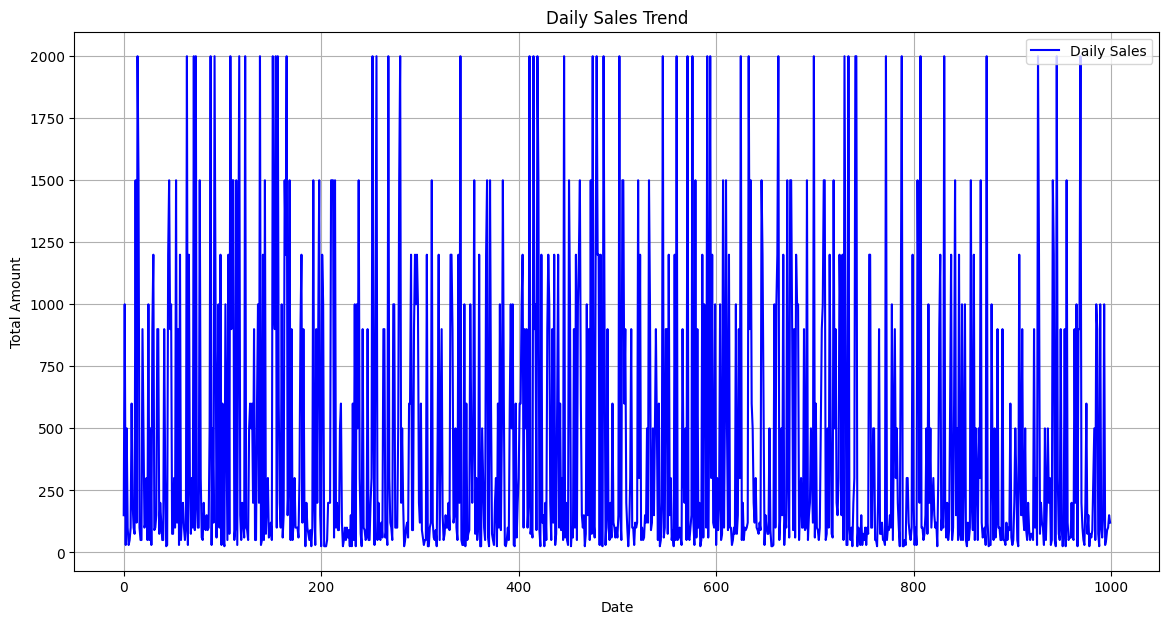

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Total Amount'], label='Daily Sales', color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.show()

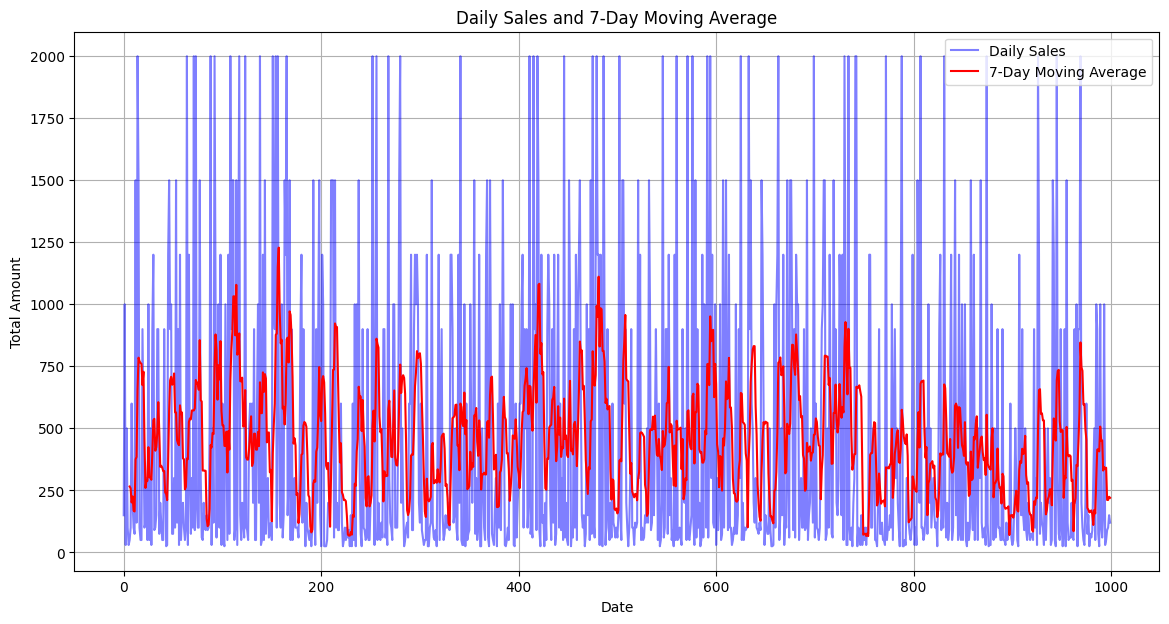

In [ ]:
data['7-Day Moving Average'] = data['Total Amount'].rolling(window=7).mean()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Total Amount'], label='Daily Sales', color='blue', alpha=0.5)
plt.plot(data.index, data['7-Day Moving Average'], label='7-Day Moving Average', color='red')
plt.title('Daily Sales and 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Index type:", type(data.index))

Index type: <class 'pandas.core.indexes.range.RangeIndex'>


In [ ]:
data.index = pd.to_datetime(data.index)

In [ ]:
print(data.index.freq)

None


In [ ]:
data = data.asfreq('D')

In [ ]:
print("Index type:", type(data.index))
print("Current index frequency:", data.index.freq)

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Current index frequency: <Day>


In [ ]:
print("Number of observations:", data['Total Amount'].dropna().shape[0])


Number of observations: 1


In [ ]:
print(monthly_sales.head())
print(monthly_sales.info())
print("monthly_sales_range: " , monthly_sales.index.min(), monthly_sales.index.max())

1970-01-31    150
Freq: M, Name: Total Amount, dtype: int64
<class 'pandas.core.series.Series'>
DatetimeIndex: 1 entries, 1970-01-31 to 1970-01-31
Freq: M
Series name: Total Amount
Non-Null Count  Dtype
--------------  -----
1 non-null      int64
dtypes: int64(1)
memory usage: 16.0 bytes
None
monthly_sales_range:  1970-01-31 00:00:00 1970-01-31 00:00:00


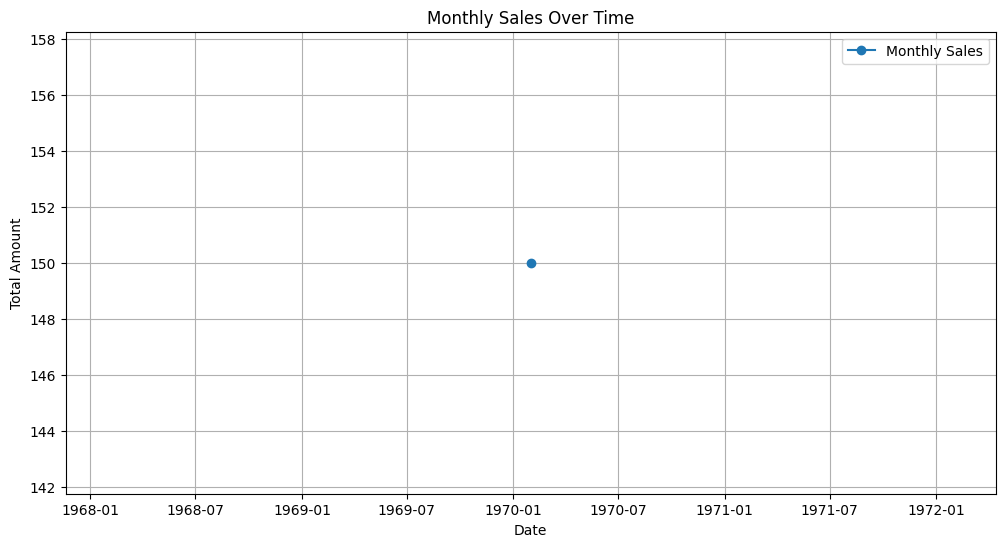

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Monthly Sales', marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Perform monthly aggregatio

# Check the results
print("Monthly Sales:\n", monthly_sales)
print("Number of Monthly Records:", monthly_sales.shape[0])  # Should be more than 1


Monthly Sales:
 1970-01-31    150
Freq: M, Name: Total Amount, dtype: int64
Number of Monthly Records: 1


In [ ]:
print("Date Range:", data.index.min(), "to", data.index.max())

# Verify number of rows in the dataset
print("Number of records:", data.shape[0])

Date Range: 1970-01-01 00:00:00 to 1970-01-01 00:00:00
Number of records: 1


Age Statistics:
 count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64


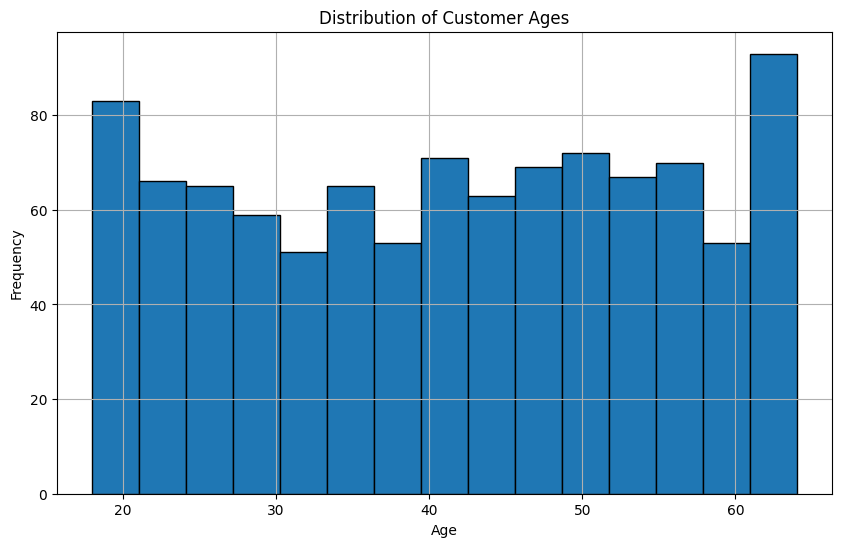

In [ ]:
import matplotlib.pyplot as plt

# Summary statistics for Age
print("Age Statistics:\n", data['Age'].describe())

# Histogram of Customer Ages
plt.figure(figsize=(10, 6))
plt.hist(data['Age'].dropna(), bins=15, edgecolor='black')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Gender Distribution:
 Gender
Female    510
Male      490
Name: count, dtype: int64


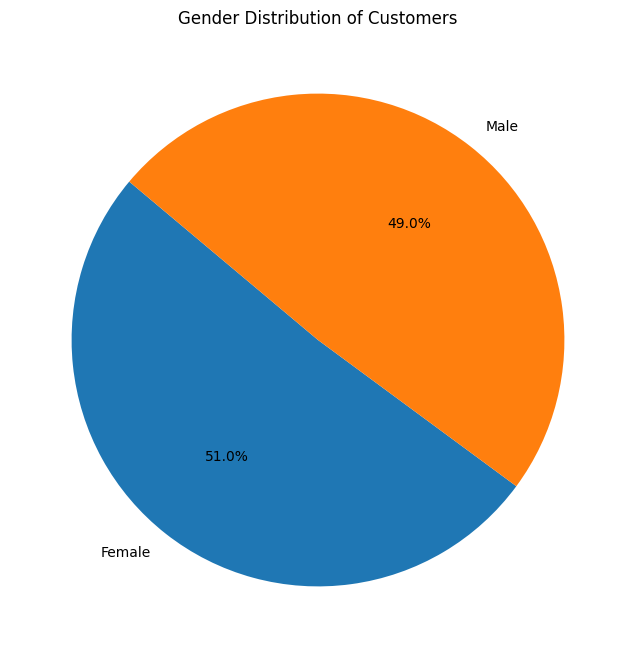

In [ ]:
# Gender distribution
gender_counts = data['Gender'].value_counts()
print("Gender Distribution:\n", gender_counts)

# Pie chart of Gender distribution
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Customers')
plt.show()


Customer Spending Statistics:
        Total Spend  Average Spend  Number of Purchases
count  1000.000000    1000.000000               1000.0
mean    456.000000     456.000000                  1.0
std     559.997632     559.997632                  0.0
min      25.000000      25.000000                  1.0
25%      60.000000      60.000000                  1.0
50%     135.000000     135.000000                  1.0
75%     900.000000     900.000000                  1.0
max    2000.000000    2000.000000                  1.0


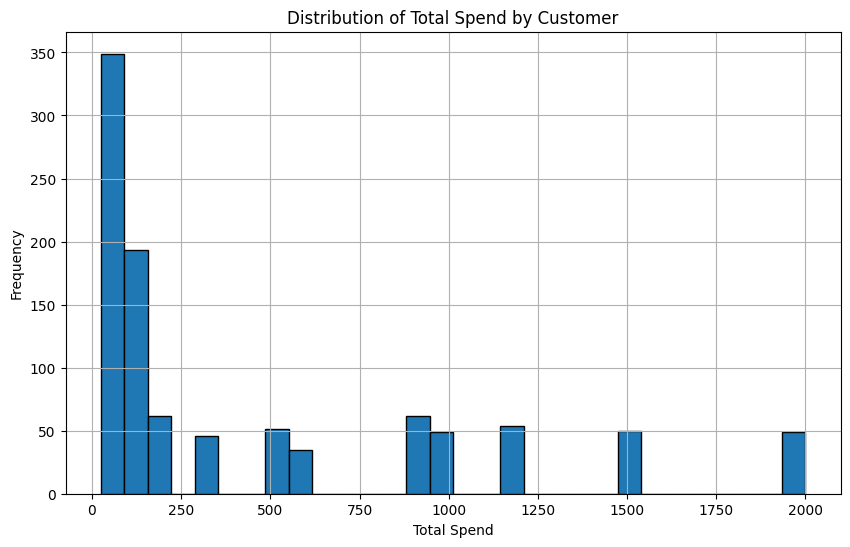

In [ ]:
# Total and average spend per customer
customer_spend = data.groupby('Customer ID')['Total Amount'].agg(['sum', 'mean', 'count'])
customer_spend.columns = ['Total Spend', 'Average Spend', 'Number of Purchases']

print("Customer Spending Statistics:\n", customer_spend.describe())

# Histogram of Total Spend
plt.figure(figsize=(10, 6))
plt.hist(customer_spend['Total Spend'], bins=30, edgecolor='black')
plt.title('Distribution of Total Spend by Customer')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Total Sales by Product Category:
 Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


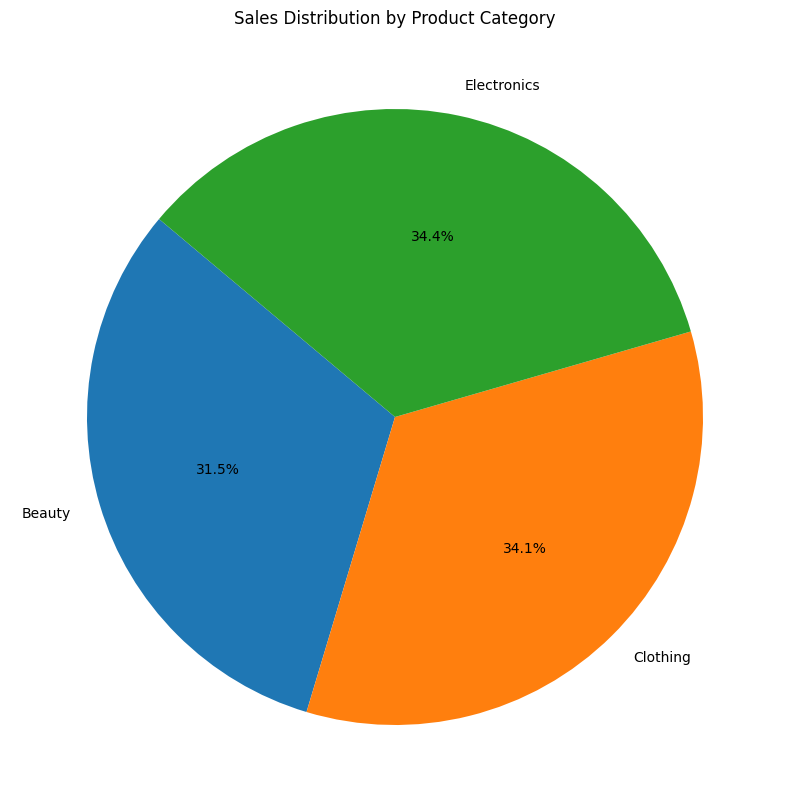

Total Quantity Sold by Product Category:
 Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64


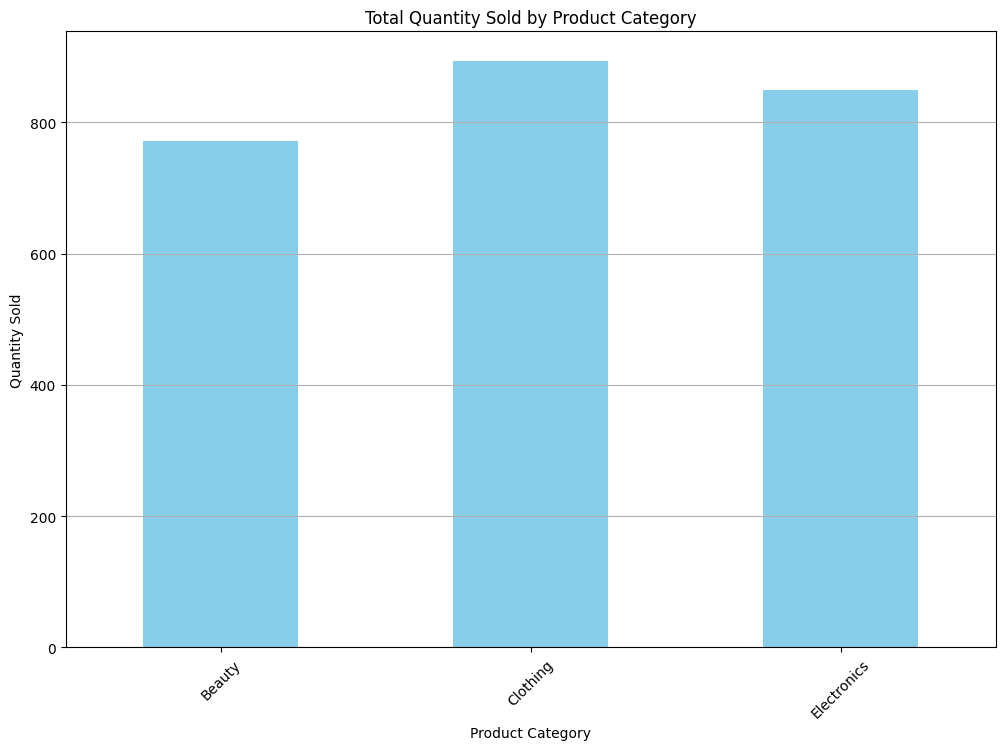

In [ ]:
# Total amount spent by Product Category
category_sales = data.groupby('Product Category')['Total Amount'].sum()
print("Total Sales by Product Category:\n", category_sales)

# Pie chart of sales by Product Category
plt.figure(figsize=(10, 10))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Product Category')
plt.show()

# Quantity of items sold by Product Category
category_quantity = data.groupby('Product Category')['Quantity'].sum()
print("Total Quantity Sold by Product Category:\n", category_quantity)

# Bar chart of quantity by Product Category
plt.figure(figsize=(12, 8))
category_quantity.plot(kind='bar', color='skyblue')
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Customer Segmentation:
 Spend Category
Low Spend          457
Medium Spend       244
Very High Spend    153
High Spend         146
Name: count, dtype: int64


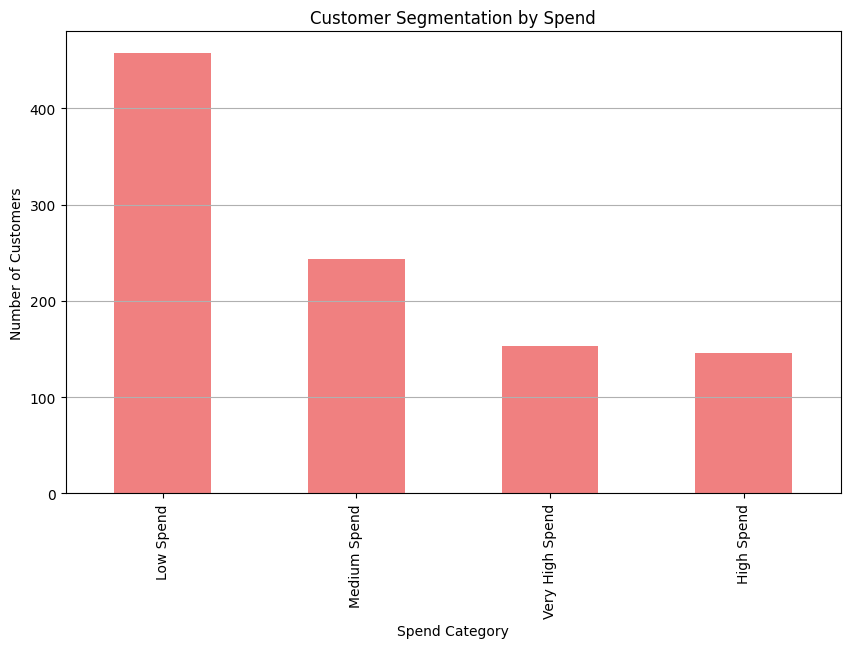

In [ ]:
# Segment customers into different spend categories
bins = [0, 100, 500, 1000, 5000]
labels = ['Low Spend', 'Medium Spend', 'High Spend', 'Very High Spend']
customer_spend['Spend Category'] = pd.cut(customer_spend['Total Spend'], bins=bins, labels=labels)

# Analyze the number of customers in each segment
segment_counts = customer_spend['Spend Category'].value_counts()
print("Customer Segmentation:\n", segment_counts)

# Bar chart of customer segments
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='lightcoral')
plt.title('Customer Segmentation by Spend')
plt.xlabel('Spend Category')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


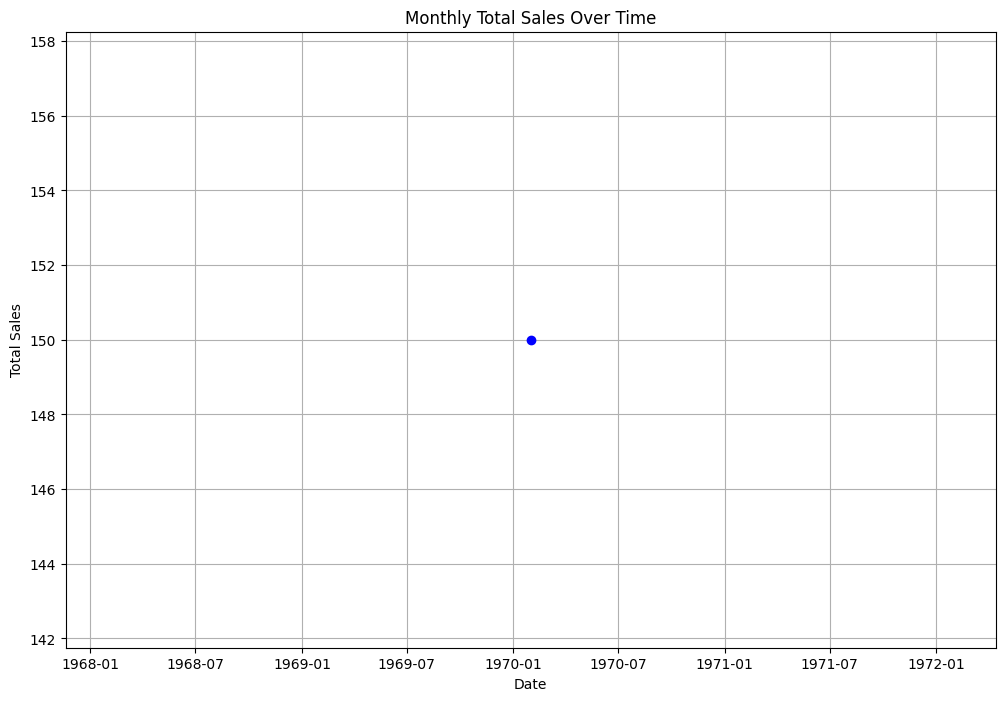

In [ ]:
# Assuming you have monthly sales data
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Monthly Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


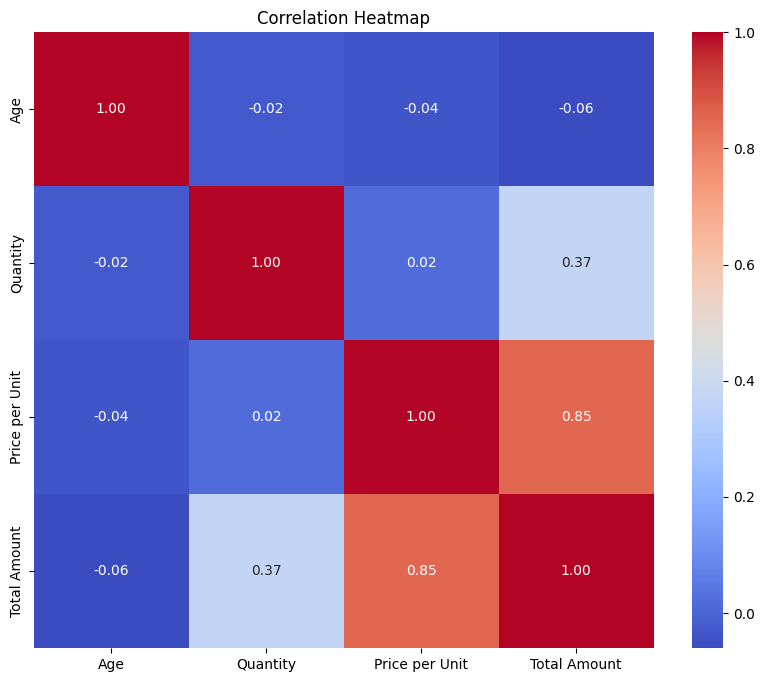

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
